In [36]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [24]:
# Load Iris datset
iris = datasets.load_iris()

In [25]:
df = pd.DataFrame(
    data=np.c_[iris["data"], iris["target"]], columns=iris["feature_names"] + ["target"]
)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


* First thing we want to do is inspect the data to see if we have any missing values or outliers

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


* `df.info()` shows that there are no missing values as we have 150 non-null values

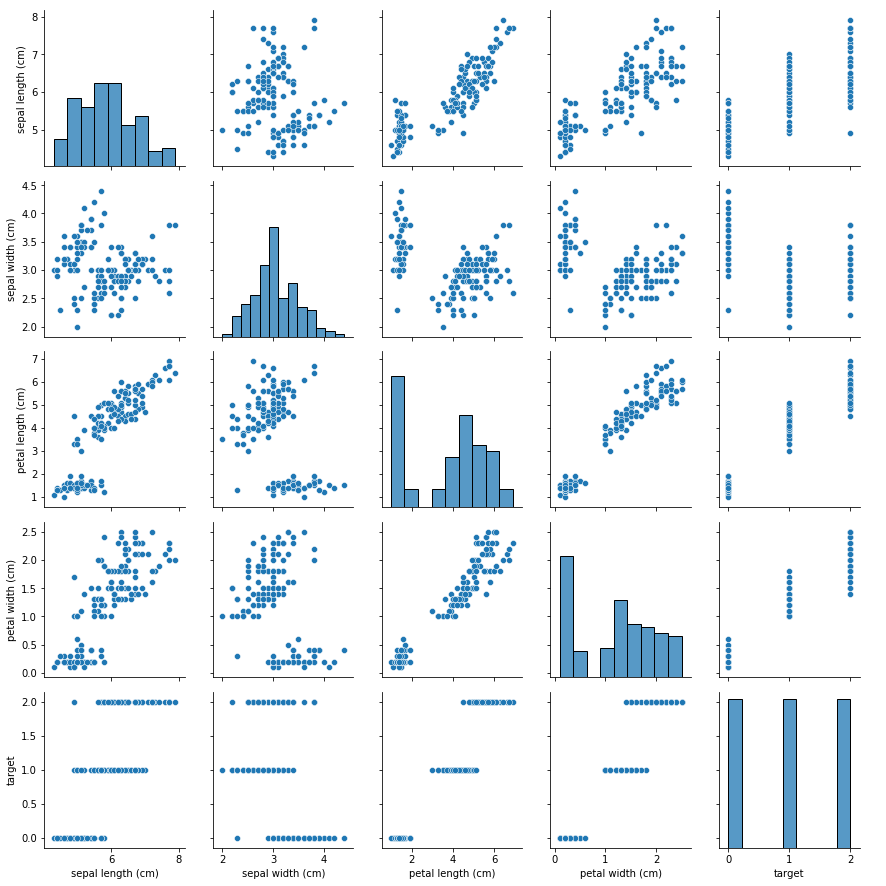

In [27]:
sns.pairplot(df)

* `sns.pairplot` gives a beautiful overview of the data

In [39]:
df_ = df.copy()
y = df_.pop('target')
X = df_

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [41]:
pipe = Pipeline([
    ("std", StandardScaler()),
    ("clf", SVC(kernel="linear", C=1))
])

In [42]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [43]:
pipe.score(X_train, y_train)

0.97

In [44]:
pipe.score(X_test, y_test)

0.98

In [53]:
X_test.iloc[[10]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
86,6.7,3.1,4.7,1.5
